- Start with general stuff

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import h5py, os
from tqdm import tqdm

import sys
sys.path.append('d:\\documents\\coding')
from utilities import get_keys, IV_T_mapping, bin_y_over_x, IV_T_plotting, IV_mapping, T_mapping
import utilities.corporate_design_colors_v3 as cpd

ModuleNotFoundError: No module named 'utilities'

In [ ]:
h = 6.62607015e-34  # V * A * s²
e = 1.602176634e-19 #     A * s
V_gap = 191e-6      # V
Delta = V_gap*e     # V * A * s
G_0 = 2*e**2/h      # A / V
R_0 = h/(2*e**2)    # V / A


Hi Oliver,

Entschuldige die Verspätung. Ich hatte leider viel zu tun, und war auch etwas eigensinnig. Da wir für das nächste Projekt ebenfalls I-V sowie ladungsaufgelösten Kurven für SS junctions benötigen, habe ich gedacht, dass ich einfach einen Code schreibe, der für beides funktioniert.

In dem folgenden Dropbox link kannst du die Daten sehen:
https://cloud.uni-konstanz.de/index.php/f/136669082

Diese sind wie folgt strukturiert:

P1_results_new_<Transmission>_n_20_T_<k_B*Temperatur in units of Delta>_NE_5000_Nchi_50.mat

Die Sachen wie n = 20, N_E = 5000 und N_chi = 50 sind nicht relevant für dich.

In jedem der Dateien gibt es die folgenden Grössen:

eV_eff_range = Die Spannung als Funktion von der Energielücke Delta

I_In = Der Strom in units of eDelta/h. 

S_In = Shotnoise (nicht relevant für dich)

In_final = Ladungsaugelöste Ströme von n = -20 bis n= 20. Also Quasiteiclhen sind bei n = 22. 

Falls du irgendwelche Fragen hast, frage bitte. :)

Beste Grüsse,
David


In [8]:
a = loadmat(f'{path}/{files[10]}')
a['In_final'].shape, a['I_In'].shape

((1180, 41), (1180, 1))

In [2]:
from scipy.io import loadmat
path='MARS'
files = os.listdir(path)

arr = loadmat(f'{path}/{files[10]}')

Voltage = np.array(arr['eV_eff_range'][0], dtype='float64')
Current = np.full((len(files), len(Voltage)), np.nan, dtype='float64')
Transmission = np.full(len(files), np.nan)

for i, file in enumerate(files):
    arr = loadmat(f'{path}/{file}')
    current = arr['I_In'][:,0]
    transmission = float(file[15:19])

    Current[i,:] = np.real(current)/2
    Transmission[i] = transmission

differential_Conductance = np.gradient(Current, Voltage, axis=1)

mars = {
    'voltage': Voltage,
    'transmission': Transmission,
    'current': Current,
    'dIdV': differential_Conductance,
}

In [5]:
path = 'CarlosIV'
arr = os.listdir(f'{path}')
arr.remove('iv.in')
arr.remove('iv.for')

v_norm = np.linspace(0,5.99,600)
V_norm = np.concatenate((-np.flip(v_norm),v_norm))
T_theo = np.zeros(len(arr)+1, dtype='float64')
I_norm_theo = np.zeros((len(T_theo), len(v_norm)), dtype='float64')

for i in range(len(arr)):
    temp = arr[i][:-4]
    value = int(temp)*10**(-len(temp)+1)
    T_theo[i+1] = value

for i, a in enumerate(arr):
    v_norm_theo = np.genfromtxt(f'{path}/{a}')[:,0]
    i_norm_theo = np.genfromtxt(f'{path}/{a}')[:,1]
    I_norm_theo[i+1,:] = bin_y_over_x(v_norm_theo, i_norm_theo, v_norm)

I_theo = np.concatenate((-np.flip(I_norm_theo, axis=1),I_norm_theo), axis=1)

dIdV_theo = np.gradient(I_theo, V_norm, axis=1)

carlos = {
    'voltage': V_norm,
    'transmission': T_theo,
    'current': I_theo,
    'dIdV': dIdV_theo,
}

C:\Users\oliver\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:1240: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\Users\oliver\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:1241: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\Users\oliver\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\Users\oliver\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:1248: RuntimeWarning: invalid value encountered in multipl

# Plot Theo Curves

AttributeError: AxesImage.set() got an unexpected keyword argument 'lim'

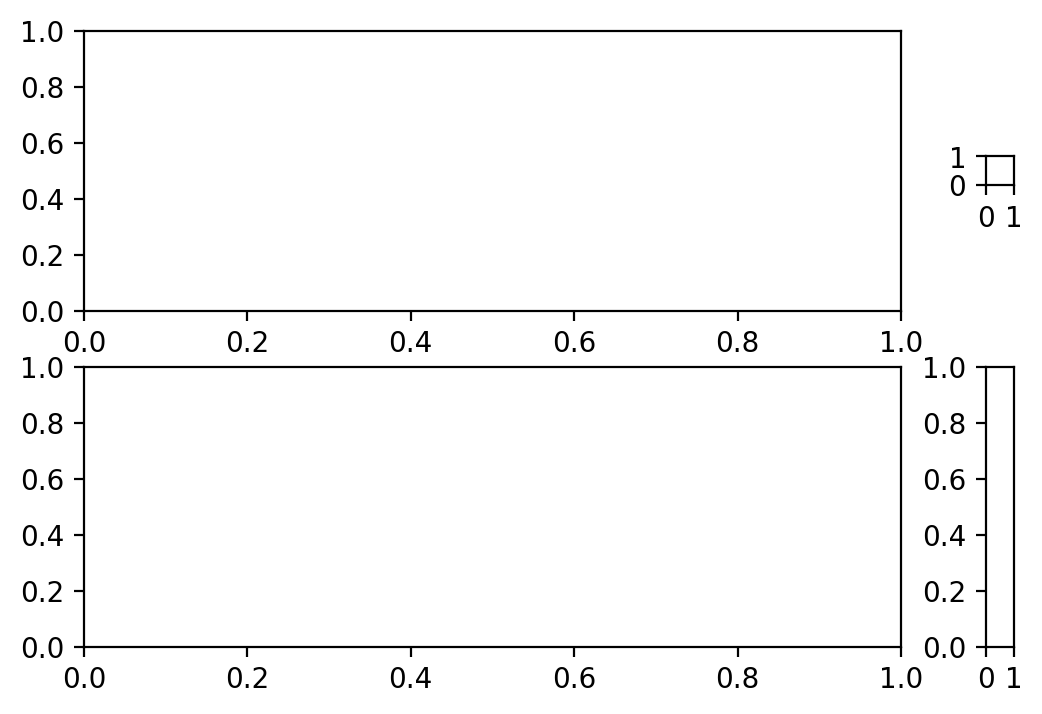

In [6]:
# %matplotlib inline
plt.close(1)
fig, axs = plt.subplots(num=1, figsize=(6,4), ncols=2, nrows=2, dpi=200,
        gridspec_kw={"width_ratios":[5.8,.2]})
gs = axs[0,1].get_gridspec()
ax11 = axs[0,0]
ax12 = axs[1,0]

t, _ = np.meshgrid(mars['transmission'], np.ones((47,)))
im = axs[0,1].imshow(t, cmap = cpd.images(inverse=True), lim=(1, .15))
axs[0,1].remove()
axs[1,1].remove()
ax_clb = fig.add_subplot(gs[:,-1])

for i, T in enumerate(mars['transmission']):
    ax11.plot(mars['voltage'], mars['current'][i,:], '.', color = cpd.images()((1-T*.85)), lw=.8, ms=1, label=f'{T:0.03}')
    ax12.plot(mars['voltage'], mars['dIdV'][i,:],    '.', color = cpd.images()((1-T*.85)), lw=.8, ms=1, label=f'{T:0.03}')

cbar=fig.colorbar(im, label=r'$T$', cax=ax_clb)

ax11.set_xticklabels([])
ax11.grid()
ax12.grid()
ax11.set_xlim(0,2.5)
ax12.set_xlim(0,2.5)
ax11.set_ylim(0,5.1)
ax12.set_ylim(0,8)

ax11.set_ylabel(r'$I\ (2e\Delta/h)$')
ax12.set_xlabel(r'$eV\ (\Delta)$')
ax12.set_ylabel(r'd$I/$d$V\ (G_0)$')
fig.suptitle('MARS')

fig.savefig('MARS.png')

AttributeError: AxesImage.set() got an unexpected keyword argument 'lim'

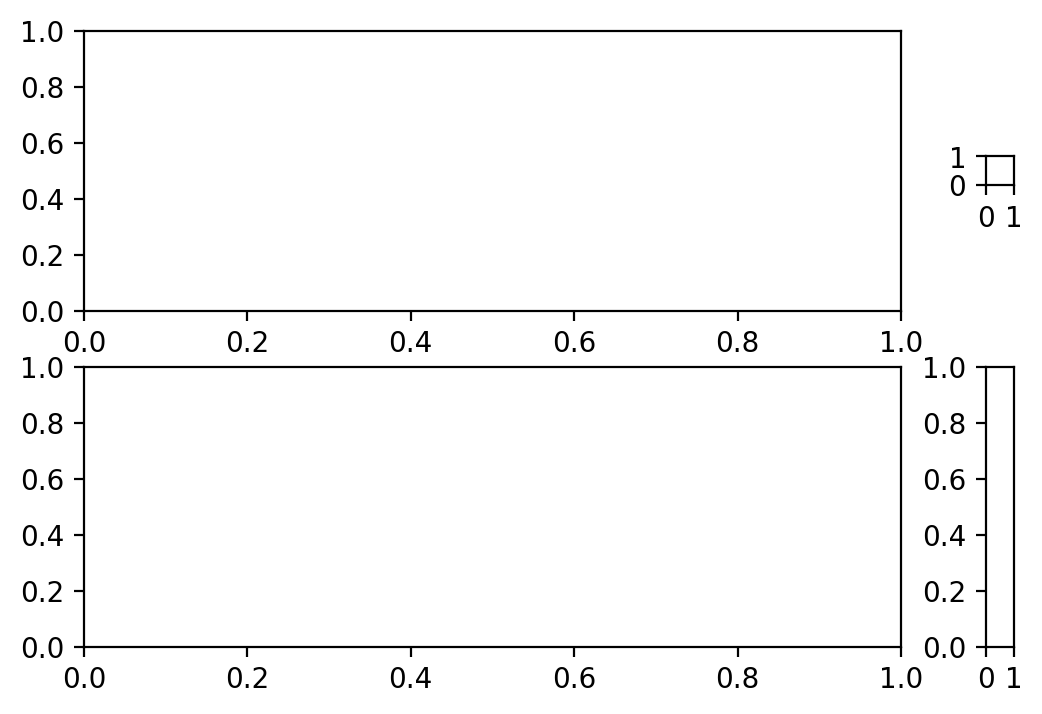

In [7]:
# %matplotlib inline
plt.close(1)
fig, axs = plt.subplots(num=1, figsize=(6,4), ncols=2, nrows=2, dpi=200,
        gridspec_kw={"width_ratios":[5.8,.2]})
gs = axs[0,1].get_gridspec()
ax11 = axs[0,0]
ax12 = axs[1,0]

t, _ = np.meshgrid(carlos['transmission'], np.ones((47,)))
im = axs[0,1].imshow(t, cmap = cpd.images(inverse=True), lim=(1, .15))
axs[0,1].remove()
axs[1,1].remove()
ax_clb = fig.add_subplot(gs[:,-1])

for i, T in enumerate(carlos['transmission']):
    ax11.plot(carlos['voltage'], carlos['current'][i,:], '.', color = cpd.images()((1-T*.85)), lw=.8, ms=1, label=f'{T:0.03}')
    ax12.plot(carlos['voltage'], carlos['dIdV'][i,:],    '.', color = cpd.images()((1-T*.85)), lw=.8, ms=1, label=f'{T:0.03}')

cbar=fig.colorbar(im, label=r'$T$', cax=ax_clb)

ax11.set_xticklabels([])
ax11.grid()
ax12.grid()
ax11.set_xlim(0,2.5)
ax12.set_xlim(0,2.5)
ax11.set_ylim(0,5.1)
ax12.set_ylim(0,8)

ax11.set_ylabel(r'$I\ (2e\Delta/h)$')
ax12.set_xlabel(r'$eV\ (\Delta)$')
ax12.set_ylabel(r'd$I/$d$V\ (G_0)$')
fig.suptitle('CarlosIV')

fig.savefig('CarlosIV.png')

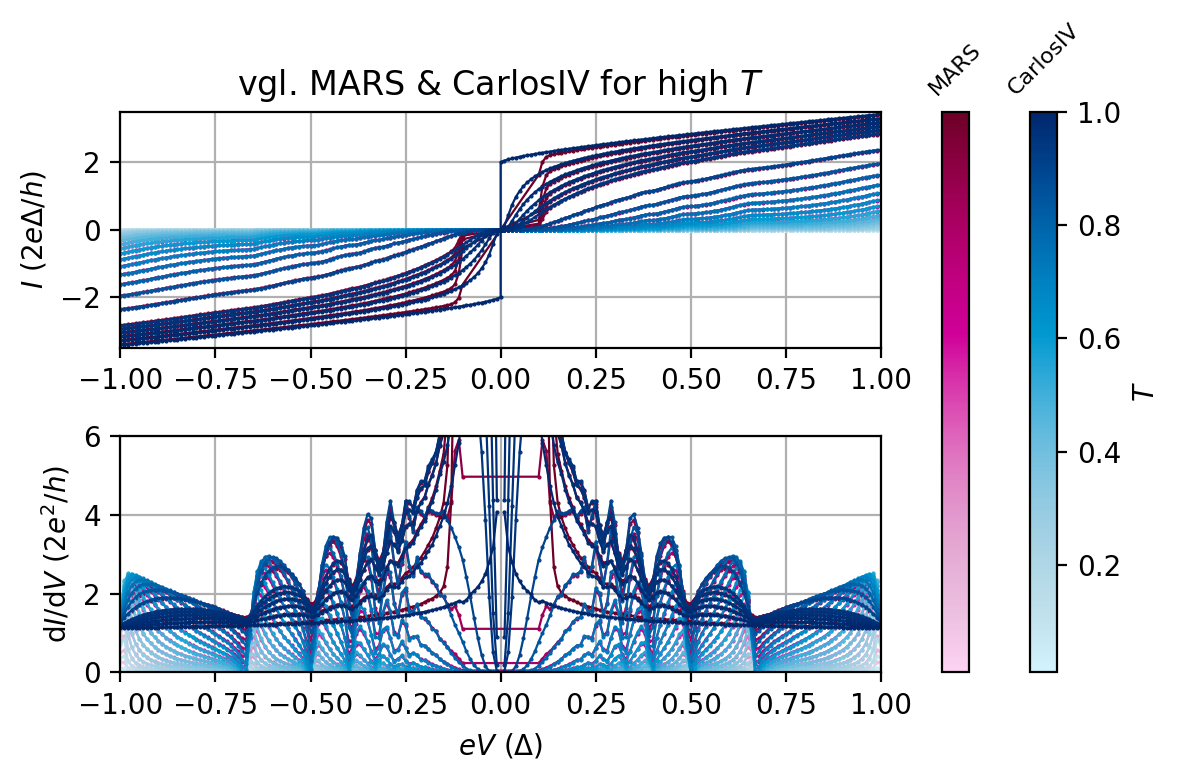

In [9]:
# %matplotlib qt
plt.close(5)
fig, axs = plt.subplots(num=5, figsize=(6,4), ncols=3, nrows=2, dpi=200,
        gridspec_kw={"width_ratios":[5.6,.2,.2]})
gs = axs[0,1].get_gridspec()
ax11 = axs[0,0]
ax12 = axs[1,0]


Ts = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 
               0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99, 1.00])

# Ts = np.array([0.7, 0.75, 0.80, 0.85, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99, 1.00])

clim = (0.2, 0.9)
t, _ = np.meshgrid(Ts, np.ones((47,)))
lim = np.array([np.min(Ts), np.max(Ts)])
im1 = axs[0,1].imshow(t, cmap = cpd.images(inverse=True, color='magenta', clim=clim), clim=lim)
im2 = axs[0,2].imshow(t, cmap = cpd.images(inverse=True, color='seeblau', clim=clim), clim=lim)
axs[0,1].remove()
axs[0,2].remove()
axs[1,1].remove()
axs[1,2].remove()
ax_clb_1 = fig.add_subplot(gs[:,-2])
ax_clb_2 = fig.add_subplot(gs[:,-1])


for i, T in enumerate(mars['transmission']):
    if int(T*100) in np.array(Ts*100, dtype='int'):
        colorT = ((T-lim[0])/(lim[1]-lim[0]))
        ax11.plot(mars['voltage'], mars['current'][i,:], '.-', color = cpd.images(color='magenta', inverse=True, clim=clim)(colorT), lw=.8, ms=1)
        ax12.plot(mars['voltage'], mars['dIdV'][i,:],    '.-', color = cpd.images(color='magenta', inverse=True, clim=clim)(colorT), lw=.8, ms=1)

for i, T in enumerate(carlos['transmission']):
    if int(T*100) in np.array(Ts*100, dtype='int'):
        colorT = ((T-lim[0])/(lim[1]-lim[0]))
        ax11.plot(carlos['voltage'], carlos['current'][i,:], '.-', color = cpd.images(inverse=True, clim=clim)(colorT), lw=.8, ms=1)    
        ax12.plot(carlos['voltage'], carlos['dIdV'][i,:],    '.-', color = cpd.images(inverse=True, clim=clim)(colorT), lw=.8, ms=1)

cbar1=fig.colorbar(im1, cax=ax_clb_1)
cbar2=fig.colorbar(im2, label=r'$T$', cax=ax_clb_2)

cbar1.set_ticks([])
cbar1.ax.set_title('MARS',     rotation = 45, fontsize=8)
cbar2.ax.set_title('CarlosIV', rotation = 45, fontsize=8)
# cbar1.set_label()


ax11.set_xticklabels([])
ax11.grid()
ax12.grid()
ax11.set_xlim(-5,5)
ax12.set_xlim(-5,5)
ax11.set_xlim(-1,1)
ax12.set_xlim(-1,1)
ax11.set_ylim(-3.5,3.5)
ax12.set_ylim(0,6)

ax11.set_xticklabels([])

ax11.sharex(ax12)
ax11.set_title(f'vgl. MARS & CarlosIV for high $T$')

ax11.set_ylabel(r'$I\ (2e\Delta/h)$')
ax12.set_xlabel(r'$eV\ (\Delta)$')
ax12.set_ylabel(r'd$I/$d$V\ (2e^2/h)$')
plt.tight_layout()

fig.savefig('vgl_MARS_CarlosIV.png')


# Color Package


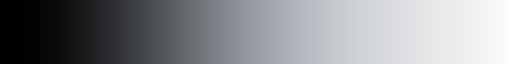

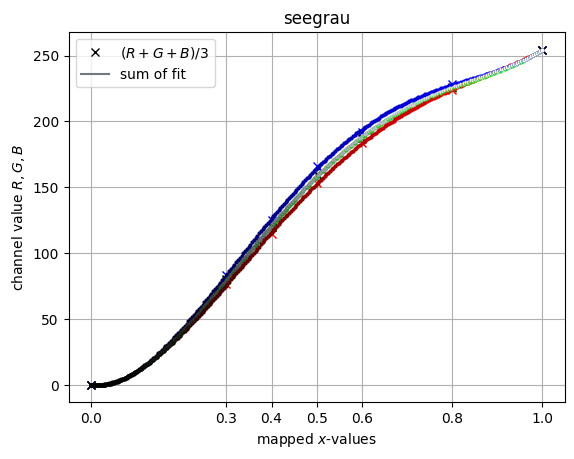

In [422]:
%matplotlib inline
'''version from 15.12.23
author: Oliver Irtenkauf

features: Coporate Design Colors of University Konstanz
and inverse colors for more contrast

'''
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap


# seeblau
x = np.array([  0,  30,  40,  50,  70,  85, 100])/100
R = np.array([  0,   0,   0,  89, 166, 204, 255])/256
G = np.array([  0, 142, 169, 199, 225, 238, 255])/256
B = np.array([  0, 206, 224, 235, 244, 249, 255])/256
RGB = (R+G+B)/3

polyRcoeff = np.polyfit(x, R, deg = 4)
polyGcoeff = np.polyfit(x, G, deg = 4)
polyBcoeff = np.polyfit(x, B, deg = 4)
polyRGBcoeff = np.polyfit(x, RGB, deg = 4)

DATABASE = {
    'seeblau': {
        'x': x,
        'R': R,
        'G': G,
        'B': B,
        'polyRcoeff': polyRcoeff,
        'polyGcoeff': polyGcoeff,
        'polyBcoeff': polyBcoeff,
    },
    'peach': {
        'x': np.array([  0,  35,  40,  50,  65,  80, 100])/100,
        'R': np.array([  0, 255, 255, 255, 255, 255, 255])/256,
        'G': np.array([  0, 142, 160, 184, 207, 226, 255])/256,
        'B': np.array([  0, 123, 144, 172, 199, 221, 255])/256,
        'polyRcoeff': np.polyfit(np.array([  0,  35,  40,  50,  65,  80, 100])/100, np.array([  0, 255, 255, 255, 255, 255, 255])/256, deg = 4),
        'polyGcoeff': np.polyfit(np.array([  0,  35,  40,  50,  65,  80, 100])/100, np.array([  0, 142, 160, 184, 207, 226, 255])/256, deg = 4),
        'polyBcoeff': np.polyfit(np.array([  0,  35,  40,  50,  65,  80, 100])/100, np.array([  0, 123, 144, 172, 199, 221, 255])/256, deg = 4),
    },
    'seegrau': {
        'x': np.array([  0,  30,  40,  50,  60,  80, 100])/100,
        'R': np.array([  0,  77, 115, 154, 184, 225, 255])/256,
        'G': np.array([  0,  80, 120, 160, 188, 226, 255])/256,
        'B': np.array([  0,  84, 126, 167, 193, 229, 255])/256,
        'polyRcoeff': np.polyfit(np.array([  0,  30,  40,  50,  60,  80, 100])/100, np.array([  0,  77, 115, 154, 184, 225, 255])/256, deg = 4),
        'polyGcoeff': np.polyfit(np.array([  0,  30,  40,  50,  60,  80, 100])/100, np.array([  0,  80, 120, 160, 188, 226, 255])/256, deg = 4),
        'polyBcoeff': np.polyfit(np.array([  0,  30,  40,  50,  60,  80, 100])/100, np.array([  0,  84, 126, 167, 193, 229, 255])/256, deg = 4),
    },
    'petrol': {
        'x': np.array([  0,  28,  33,  45,  60,  75, 100])/100,
        'R': np.array([  0,   3,   7,  57, 106, 156, 255])/256,
        'G': np.array([  0,  95, 113, 141, 170, 198, 255])/256,
        'B': np.array([  0, 114, 135, 159, 183, 207, 255])/256,
        'polyRcoeff': np.polyfit(np.array([  0,  28,  33,  45,  60,  75, 100])/100, np.array([  0,   3,   7,  57, 106, 156, 255])/256, deg = 4),
        'polyGcoeff': np.polyfit(np.array([  0,  28,  33,  45,  60,  75, 100])/100, np.array([  0,  95, 113, 141, 170, 198, 255])/256, deg = 4),
        'polyBcoeff': np.polyfit(np.array([  0,  28,  33,  45,  60,  75, 100])/100, np.array([  0, 114, 135, 159, 183, 207, 255])/256, deg = 4),
    },
    'seegrün': {
        'x': np.array([  0,  25,  30,  35,  60,  75, 100])/100,
        'R': np.array([  0,   6,  10,  10,  84, 113, 255])/256,
        'G': np.array([  0, 126, 144, 163, 191, 209, 255])/256,
        'B': np.array([  0, 121, 134, 152, 183, 204, 255])/256,
        'polyRcoeff': np.polyfit(np.array([  0,  25,  30,  35,  60,  75, 100])/100, np.array([  0,   6,  10,  10,  84, 113, 255])/256, deg = 4),
        'polyGcoeff': np.polyfit(np.array([  0,  25,  30,  35,  60,  75, 100])/100, np.array([  0, 126, 144, 163, 191, 209, 255])/256, deg = 4),
        'polyBcoeff': np.polyfit(np.array([  0,  25,  30,  35,  60,  75, 100])/100, np.array([  0, 121, 134, 152, 183, 204, 255])/256, deg = 4),
    },
    'karpfenblau': {
        'x': np.array([  0,  25,  35,  45,  60,  75, 100])/100,
        'R': np.array([  0,  50,  62,  88, 130, 180, 255])/256,
        'G': np.array([  0,  67,  84, 107, 144, 188, 255])/256,
        'B': np.array([  0, 118, 150, 164, 187, 214, 255])/256,
        'polyRcoeff': np.polyfit(np.array([  0,  25,  35,  45,  60,  75, 100])/100, np.array([  0,  50,  62,  88, 130, 180, 255])/256, deg = 4),
        'polyGcoeff': np.polyfit(np.array([  0,  25,  35,  45,  60,  75, 100])/100, np.array([  0,  67,  84, 107, 144, 188, 255])/256, deg = 4),
        'polyBcoeff': np.polyfit(np.array([  0,  25,  35,  45,  60,  75, 100])/100, np.array([  0, 118, 150, 164, 187, 214, 255])/256, deg = 4),
    },
    'pinky': {
        'x': np.array([  0,  25,  35,  45,  55,  75, 100])/100,
        'R': np.array([  0, 202, 224, 230, 236, 243, 255])/256,
        'G': np.array([  0,  74,  96, 128, 160, 191, 255])/256,
        'B': np.array([  0, 104, 126, 152, 178, 203, 255])/256,
        'polyRcoeff': np.polyfit(np.array([  0,  25,  35,  45,  55,  75, 100])/100, np.array([  0, 202, 224, 230, 236, 243, 255])/256, deg = 4),
        'polyGcoeff': np.polyfit(np.array([  0,  25,  35,  45,  55,  75, 100])/100, np.array([  0,  74,  96, 128, 160, 191, 255])/256, deg = 4),
        'polyBcoeff': np.polyfit(np.array([  0,  25,  35,  45,  55,  75, 100])/100, np.array([  0, 104, 126, 152, 178, 203, 255])/256, deg = 4),
    },
    'bordeaux': {
        'x': np.array([  0,  25,  33,  48,  63,  75, 100])/100,
        'R': np.array([  0, 119, 142, 165, 188, 210, 255])/256,
        'G': np.array([  0,  20,  32,  77, 122, 166, 255])/256,
        'B': np.array([  0,  52,  67, 105, 143, 180, 255])/256,
        'polyRcoeff': np.polyfit(np.array([  0,  25,  33,  48,  63,  75, 100])/100, np.array([  0, 119, 142, 165, 188, 210, 255])/256, deg = 4),
        'polyGcoeff': np.polyfit(np.array([  0,  25,  33,  48,  63,  75, 100])/100, np.array([  0,  20,  32,  77, 122, 166, 255])/256, deg = 4),
        'polyBcoeff': np.polyfit(np.array([  0,  25,  33,  48,  63,  75, 100])/100, np.array([  0,  52,  67, 105, 143, 180, 255])/256, deg = 4),
    },
    'amber': {
        'x': x,
        'R': B,
        'G': G,
        'B': R,
        'polyRcoeff': polyBcoeff,
        'polyGcoeff': polyGcoeff,
        'polyBcoeff': polyRcoeff,
    },
    'magenta': {
        'x': x,
        'R': B,
        'G': R,
        'B': G,
        'polyRcoeff': polyBcoeff,
        'polyGcoeff': polyRcoeff,
        'polyBcoeff': polyGcoeff,
    },
    'mint': {
        'x': x,
        'R': R,
        'G': B,
        'B': G,
        'polyRcoeff': polyRcoeff,
        'polyGcoeff': polyBcoeff,
        'polyBcoeff': polyGcoeff,
    },
    'lila': {
        'x': x,
        'R': G,
        'G': R,
        'B': B,
        'polyRcoeff': polyGcoeff,
        'polyGcoeff': polyRcoeff,
        'polyBcoeff': polyBcoeff,
    },
    'lime': {
        'x': x,
        'R': G,
        'G': B,
        'B': R,
        'polyRcoeff': polyGcoeff,
        'polyGcoeff': polyBcoeff,
        'polyBcoeff': polyRcoeff,
    },
    'grey':{        
        'x': x,
        'R': RGB,
        'G': RGB,
        'B': RGB,
        'polyRcoeff': polyRGBcoeff,
        'polyGcoeff': polyRGBcoeff,
        'polyBcoeff': polyRGBcoeff,
    }
}


'''
seeblau
    R=np.array([-89,0,89,160,200,255])/256
    G=np.array([0,154,182,211,229,292])/256
    B=np.array([0,209,220,230,239,305])/256
    x=np.array([0,2.4,2.9,3.7,4.2,5])/5
    polyRcoeff=np.polyfit(x,R,deg=4)
    polyGcoeff=np.polyfit(x,G,deg=4)
    polyBcoeff=np.polyfit(x,B,deg=4)
amber (BGR)
magenta (BRG)
mint (RBG)
lila (GRB)
lime (GBR)
grey
    R=np.array([0,209,220,230,239,255])/256
    G=np.array([0,0,89,160,200,255])/256
    B=np.array([0,154,182,211,229,255])/256
    x=np.array([0,2,2.9,3.7,4.2,5])/5
    RGB=(R+G+B)/3
    R,G,B,A=RGB,RGB,RGB,RGB
    polyRGBcoeff=np.polyfit(x,RGB,deg=4)
    polyRcoeff=polyRGBcoeff
    polyGcoeff=polyRGBcoeff

'''

def cmap(
        color='seeblau', 
        bad = 'red',
        inverse = False, 
        clim = (0,1), 
        over = 'white', 
        under = 'black', 
        plot = False,
        num = 0,
        ):
    x = np.linspace(clim[0],clim[1],256)
    polyR = np.poly1d(DATABASE[color]['polyRcoeff'])(x)
    polyG = np.poly1d(DATABASE[color]['polyGcoeff'])(x)
    polyB = np.poly1d(DATABASE[color]['polyBcoeff'])(x)
    mapped = np.array([polyR.T, polyG.T, polyB.T, np.ones(256).T]).T
    mapped[mapped<=0]=0
    mapped[mapped>=1]=1
    if plot:
        plot_cmap(x, mapped, color=color, num = num)
    if inverse:
        mapped = np.flip(mapped, axis=0)
        over, under = under, over
    colormap = ListedColormap(mapped)
    colormap.set_over(color = over)
    colormap.set_under(color = under)
    colormap.set_bad(color = bad)
    return colormap

def plot_cmap(
        x,
        mapped,
        color = 'seeblau', 
        num = 1,
        ):
    plt.close(num)
    _, ax = plt.subplots(1, 1, num=num)
    ax.plot(DATABASE[color]['x'], DATABASE[color]['R']*255, 'xr')
    ax.plot(DATABASE[color]['x'], DATABASE[color]['G']*255, 'xg')
    ax.plot(DATABASE[color]['x'], DATABASE[color]['B']*255, 'xb')
    ax.plot(DATABASE[color]['x'], (DATABASE[color]['R']+DATABASE[color]['G']+DATABASE[color]['B'])/3*255, 'xk', label=f'$(R+G+B)/3$')

    ax.plot(x, (mapped[:,0]+mapped[:,1]+mapped[:,2])/3*255, '-', label=f"sum of fit",
             color=[DATABASE[color]['R'][2], DATABASE[color]['G'][2], DATABASE[color]['B'][2], 1])
    ms = 4
    for i, X in enumerate(x):
        ax.plot(X, mapped[i,0]*255, '.', color = [mapped[i,0], 0, 0, 1], ms=ms)
        ax.plot(X, mapped[i,1]*255, '.', color = [0, mapped[i,1], 0, 1], ms=ms)
        ax.plot(X, mapped[i,2]*255, '.', color = [0, 0, mapped[i,2], 1], ms=ms)
        ax.plot(X, np.sum(mapped[i,:3])/3*255,'.', color = [mapped[i,0], mapped[i,1], mapped[i,2], 1], ms=ms)
    ax.grid()
    ax.set_ylim([-.05*255,1.05*255])
    ax.legend()
    ax.set_xticks(DATABASE[color]['x'])
    ax.set_ylabel('channel value $R,G,B$')
    ax.set_xlabel('mapped $x$-values')
    ax.set_title(f'{color}')

cmap(color='seegrau', clim=(0,1), inverse=False, plot=True)

In [403]:
over, under = 0, 1
over, under = under, over
over, under

(1, 0)

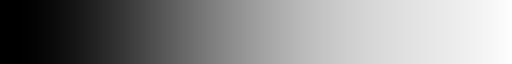

-0.9039705144522031 1.1909830873282838


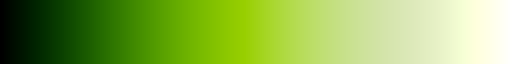

In [153]:
x=np.array([0,2.4,2.9,3.7,4.2,5])/5
R=np.array([0,154,182,211,229,292])/256
G=np.array([0,209,220,230,239,305])/256
B=np.array([-89,0,89,160,200,255])/256
polyRcoeff=np.polyfit(x,R,deg=4)
polyGcoeff=np.polyfit(x,G,deg=4)
polyBcoeff=np.polyfit(x,B,deg=4)

def images(color='seeblau', clim = None, inverse=False):
    x=np.array([0,2.4,2.9,3.7,4.2,5])/5
    R=np.array([0,154,182,211,229,292])/256 #G
    G=np.array([0,209,220,230,239,305])/256 #B
    B=np.array([-89,0,89,160,200,255])/256 #R
    polyRcoeff=np.polyfit(x,R,deg=4)
    polyGcoeff=np.polyfit(x,G,deg=4)
    polyBcoeff=np.polyfit(x,B,deg=4)
    if clim is None:
        clim=(0,1)
    x = np.linspace(clim[0],clim[1],256)
    polyR = np.poly1d(polyRcoeff)(x)
    polyG = np.poly1d(polyGcoeff)(x)
    polyB = np.poly1d(polyBcoeff)(x)
    mapped = np.array([polyR.T, polyG.T, polyB.T, np.ones(256).T]).T
    print(np.min(mapped), np.max(mapped))
    mapped[mapped<=0]=0
    mapped[mapped>=1]=1
    if inverse:
        mapped = np.flip(mapped, axis=0)
    colormap = ListedColormap(mapped)
    colormap.set_bad(color='red')
    colormap.set_over(color='white')
    colormap.set_under(color='black')
    return colormap

images()

In [114]:

R=np.array([0,209,220,230,239,255])/256
G=np.array([0,0,89,160,200,255])/256
B=np.array([0,154,182,211,229,255])/256
x=np.array([0,2,2.9,3.7,4.2,5])/5
RGB=(R+G+B)/3
R,G,B,A=RGB,RGB,RGB,RGB
polyRGBcoeff=np.polyfit(x,RGB,deg=4)
polyRcoeff=polyRGBcoeff
polyGcoeff=polyRGBcoeff
polyBcoeff=polyRGBcoeff

polyRcoeff, polyGcoeff, polyBcoeff, RGB

(array([-6.55957110e-01,  1.61591860e+00, -1.54835026e+00,  1.58450540e+00,
        -1.55087207e-06]),
 array([-6.55957110e-01,  1.61591860e+00, -1.54835026e+00,  1.58450540e+00,
        -1.55087207e-06]),
 array([-6.55957110e-01,  1.61591860e+00, -1.54835026e+00,  1.58450540e+00,
        -1.55087207e-06]),
 array([0.        , 0.47265625, 0.63932292, 0.78255208, 0.86979167,
        0.99609375]))

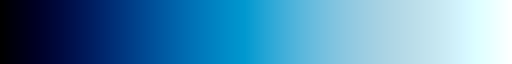

In [109]:
images()

In [89]:
mars['transmission'], carlos['transmission']

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
        0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
        0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
        0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
        0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
        0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
        0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
        0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
        0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
        1.  ]),
 array([0.   , 0.01 , 0.02 , 0.025, 0.03 , 0.04 , 0.05 , 0.075, 0.1  ,
        0.125, 0.15 , 0.175, 0.2  , 0.225, 0.25 , 0.275, 0.3  , 0.325,
        0.35 , 0.375, 0.4  , 0.425, 0.45 , 0.475, 0.5  , 0.525, 0.55 ,
        0.575, 0.6  , 0.625, 0.65 , 0.675, 0.7  , 0.725, 0.75 , 0.775,
        0.8  , 0.825, 0.85 , 0.875

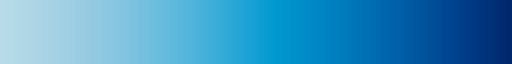

In [58]:
cpd.images(plotter=True, inverse=True, clim=(0.2,0.8))

In [39]:
np.array(cpd.images(inverse=True, color='seeblau'), dtype='float64')

TypeError: float() argument must be a string or a real number, not 'ListedColormap'

In [286]:
im1

In [280]:
mars['transmission']

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

# Get Gap energy from tunnel junction

In [228]:
V1_AMP = 1000
V2_AMP = 10000
R_REF = 53000

path = os.getcwd()
file = h5py.File(f'{path}\..\\23 11 15 PR22e9 0.025G0\\23_11_15_S22_tunneljuntion_0.025G0_1.hdf5', 'r')

mkey = "single IV_+0.00mT_nanGHz_+nandBm"

offset= file['measurement'][mkey]["offset"]["adwin"]

off_v1 = np.nanmean(offset["V1"])
off_v2 = np.nanmean(offset["V2"])
sweep = file['measurement'][mkey]["sweep"]["adwin"]

trigger = np.array(sweep['trigger'], dtype='int')
v1 = np.array(sweep['V1'], dtype='float64')
v2 = np.array(sweep['V2'], dtype='float64')

v_raw = (v1 - off_v1) / V1_AMP
i_raw = (v2 - off_v2) / V2_AMP / R_REF

v_raw_up = v_raw[trigger==1]
v_raw_down = v_raw[trigger==2]

i_raw_up = i_raw[trigger==1]
i_raw_down = i_raw[trigger==2]

V_raw = np.linspace(-6*191e-6, 6*191e-6, 360+1)

I_raw_up = bin_y_over_x(v_raw_up, i_raw_up, V_raw)
I_raw_down = bin_y_over_x(v_raw_down, i_raw_down, V_raw)

dIdV_raw_up= np.gradient(I_raw_up, V_raw)
dIdV_raw_down= np.gradient(I_raw_down, V_raw)

tunnel_junction ={
    "voltage_raw": V_raw,
    "voltage": V_raw/V_gap,
    "transmission": 0.025,
    "current_up_raw": I_raw_up,
    "current_up": I_raw_up*h/(2*e*Delta),
    "current_down_raw": I_raw_down,
    "current_down": I_raw_down*h/(2*e*Delta),
    "dIdV_up_raw": dIdV_raw_up,
    "dIdV_up": dIdV_raw_up/G_0,
    "dIdV_down_raw": dIdV_raw_down,
    "dIdV_down": dIdV_raw_down/G_0,
}

In [230]:
plt.plot(tunnel_junction['voltage'], tunnel_junction['dIdV_up'])

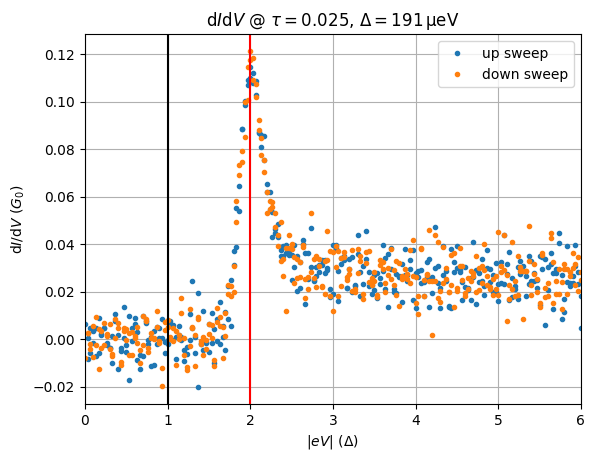

In [250]:
%matplotlib inline
plt.close(3)
plt.figure(3)

plt.plot(np.abs(tunnel_junction['voltage']), tunnel_junction['dIdV_up'],   '.', label='up sweep')
plt.plot(np.abs(tunnel_junction['voltage']), tunnel_junction['dIdV_down'], '.', label='down sweep')
ylim = plt.ylim()

plt.vlines(1, ymin=ylim[0], ymax=ylim[1], color='k',   )#label=fr'$1\,\Delta = {1*V_gap*1e6:.1f}\,$µeV', zorder=1)
plt.vlines(2, ymin=ylim[0], ymax=ylim[1], color='red', )#label=fr'$2\,\Delta = {2*V_gap*1e6:.1f}\,$µeV', zorder=1)

plt.xlim([0,6])

plt.ylim(ylim)
plt.grid()
plt.legend()
plt.xlabel(r'$|eV|\ (\Delta)$')
plt.ylabel(r'd$I/$d$V\ (G_0)$')
plt.title('d$I$d$V$ @ $\\tau=0.025$, $\Delta=191\,$µeV')
plt.savefig('dIdV G=0.025G0 tunnelbarrier.pdf')
plt.savefig('dIdV G=0.025G0 tunnelbarrier.png')

# Archiv

In [147]:
Voltage, len(Voltage), np.min(np.abs(Voltage))

(array([-5.99, -5.98, -5.97, ...,  5.97,  5.98,  5.99]), 1180, 0.1)

In [157]:
v= np.linspace(-5.99, 5.99, 1181)
v_nu = np.concatenate((v[:590], v[591:]))
v_nu, len(v_nu)
Voltage = v_nu

In [158]:
%matplotlib qt
plt.plot(voltage, '.')

In [185]:
# %matplotlib inline
plt.close(1)
fig, axs = plt.subplots(num=1, figsize=(6,4), ncols=2, nrows=2, dpi=200,
        gridspec_kw={"width_ratios":[5.8,.2]})
gs = axs[0,1].get_gridspec()
ax11 = axs[0,0]
ax12 = axs[1,0]

t, _ = np.meshgrid(Transmission, np.ones((47,)))
im = axs[0,1].imshow(t, cmap = cpd.images(inverse=True), lim=(1, .15))
axs[0,1].remove()
axs[1,1].remove()
ax_clb = fig.add_subplot(gs[:,-1])

for i, T in enumerate(Transmission):
    ax11.plot(Voltage, Current[i,:], '.',label=f'{T:0.03}', color = cpd.images()((1-T*.85)), lw=.8, ms=1)
    ax12.plot(Voltage, differential_Conductance[i,:], '.',label=f'{T:0.03}', color = cpd.images()((1-T*.85)), lw=.8, ms=1)

cbar=fig.colorbar(im, label=r'$T$', cax=ax_clb)

ax11.set_xticklabels([])
ax11.grid()
ax12.grid()
ax11.set_xlim(0,2.5)
ax12.set_xlim(0,2.5)
ax11.set_ylim(0,5.1)
ax12.set_ylim(0,8)

ax11.set_ylabel(r'$I\ (2e\Delta/h)$')
ax12.set_xlabel(r'$eV\ (\Delta)$')
ax12.set_ylabel(r'd$I/$d$V\ (G_0)$')

fig.savefig('MARS.png')

In [170]:
path = 'CarlosIV'
arr = os.listdir(f'{path}')
arr.remove('iv.in')
arr.remove('iv.for')

v_norm = np.linspace(0,5.99,600)
V_norm = np.concatenate((-np.flip(v_norm)[:-1],v_norm))
V_norm = np.concatenate((-np.flip(v_norm),v_norm))
T_theo = np.zeros(len(arr)+1, dtype='float64')
I_norm_theo = np.zeros((len(T_theo), len(v_norm)), dtype='float64')

for i in range(len(arr)):
    temp = arr[i][:-4]
    value = int(temp)*10**(-len(temp)+1)
    T_theo[i+1] = value

for i, a in enumerate(arr):
    v_norm_theo = np.genfromtxt(f'{path}/{a}')[:,0]
    i_norm_theo = np.genfromtxt(f'{path}/{a}')[:,1]
    I_norm_theo[i+1,:] = bin_y_over_x(v_norm_theo, i_norm_theo, v_norm)

I_theo = np.concatenate((-np.flip(I_norm_theo, axis=1)[:,:-1],I_norm_theo), axis=1)
I_theo = np.concatenate((-np.flip(I_norm_theo, axis=1),I_norm_theo), axis=1)

dIdV_norm_theo = np.gradient(I_norm_theo, v_norm, axis=1)
dIdV_theo = np.gradient(I_theo, V_norm, axis=1)

C:\Users\oliver\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:1240: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\Users\oliver\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:1241: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\Users\oliver\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\Users\oliver\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:1248: RuntimeWarning: invalid value encountered in multipl

In [163]:
i=0
i -= -2
i

2

In [164]:
T_theo

array([0.   , 0.01 , 0.02 , 0.025, 0.03 , 0.04 , 0.05 , 0.075, 0.1  ,
       0.125, 0.15 , 0.175, 0.2  , 0.225, 0.25 , 0.275, 0.3  , 0.325,
       0.35 , 0.375, 0.4  , 0.425, 0.45 , 0.475, 0.5  , 0.525, 0.55 ,
       0.575, 0.6  , 0.625, 0.65 , 0.675, 0.7  , 0.725, 0.75 , 0.775,
       0.8  , 0.825, 0.85 , 0.875, 0.9  , 0.925, 0.95 , 0.96 , 0.97 ,
       0.98 , 0.99 , 1.   ])

In [165]:
plt.plot(Transmission, '.')

In [166]:
Transmission, T_theo, np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.1,
       0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55,
       0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.96, 
       0.97, 0.98, 0.99, 1.])

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
        0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
        0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
        0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
        0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
        0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
        0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
        0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
        0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
        1.  ]),
 array([0.   , 0.01 , 0.02 , 0.025, 0.03 , 0.04 , 0.05 , 0.075, 0.1  ,
        0.125, 0.15 , 0.175, 0.2  , 0.225, 0.25 , 0.275, 0.3  , 0.325,
        0.35 , 0.375, 0.4  , 0.425, 0.45 , 0.475, 0.5  , 0.525, 0.55 ,
        0.575, 0.6  , 0.625, 0.65 , 0.675, 0.7  , 0.725, 0.75 , 0.775,
        0.8  , 0.825, 0.85 , 0.875

In [183]:
%matplotlib qt
plt.close(3)
fig, axs = plt.subplots(num=3, figsize=(6,4), ncols=2, nrows=2, dpi=200,
        gridspec_kw={"width_ratios":[5.8,.2]})
gs = axs[0,1].get_gridspec()
ax11 = axs[0,0]
ax12 = axs[1,0]

t, _ = np.meshgrid(T_theo, np.ones((47,)))
im = axs[0,1].imshow(t, cmap = cpd.images(inverse=True), lim=(1, .15))
axs[0,1].remove()
axs[1,1].remove()
ax_clb = fig.add_subplot(gs[:,-1])

Ts = np.array(np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55,
       0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1.])*100, dtype='int')

Ts = [35]
j=0
for i, T in enumerate(np.array(T_theo*100, dtype='int')):
    if T in Ts:
        print(T)
        if j == 0:
            ax11.plot(V_norm, I_theo[i,:], '.', color = cpd.images(color='magenta')((1-T/100*.85)), lw=.8, ms=1, label='CarlosIV')
            j+=1  
        else:
            ax11.plot(V_norm, I_theo[i,:], '.', color = cpd.images(color='magenta')((1-T/100*.85)), lw=.8, ms=1)
        ax12.plot(V_norm, dIdV_theo[i,:], '.', color = cpd.images(color='magenta')((1-T/100*.85)), lw=.8, ms=1)

j=0
for i, T in enumerate(np.array(Transmission*100, dtype='int')):
    if T in Ts:
        print(T)
        if j == 0:
            ax11.plot(Voltage, Current[i,:], '.', color = cpd.images()((1-T/100*.85)), lw=.8, ms=1, label='MARS')
            j+=1  
        else:
            ax11.plot(Voltage, Current[i,:], '.', color = cpd.images()((1-T/100*.85)), lw=.8, ms=1)    
        ax12.plot(Voltage, differential_Conductance[i,:], '.', color = cpd.images()((1-T/100*.85)), lw=.8, ms=1)

cbar=fig.colorbar(im, label=r'$T$', cax=ax_clb)

ax11.set_xticklabels([])
ax11.grid()
ax12.grid()
# ax11.set_xlim(0,2.5)
# ax12.set_xlim(0,2.5)
# ax11.set_ylim(0,5.1)
# ax12.set_ylim(0,8)
# ax12.legend()

ax11.sharex(ax12)

ax11.legend()

ax11.set_ylabel(r'$I\ (2e\Delta/h)$')
ax12.set_xlabel(r'$eV\ (\Delta)$')
ax12.set_ylabel(r'd$I/$d$V\ (2e^2/h)$')


35
35


Text(0, 0.5, 'd$I/$d$V\\ (2e^2/h)$')

In [63]:
np.shape(Current), np.shape(Transmission), np.shape(Voltage)

((100, 1180), (100,), (1180,))

In [64]:
Transmission, Voltage, Current

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
        0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
        0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
        0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
        0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
        0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
        0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
        0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
        0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
        1.  ]),
 array([-5.99, -5.98, -5.97, ...,  5.97,  5.98,  5.99]),
 array([[ -0.11680321,  -0.11659813,  -0.11639304, ...,   0.11639304,
           0.11659813,   0.11680321],
        [ -0.23405069,  -0.23364058,  -0.23323043, ...,   0.23323043,
           0.23364058,   0.23405069],
        [ -0.35175474,  -0.35113963,  -0.3505

In [44]:
arr = loadmat(f'{path}/{files[0]}')

Voltage = np.array(arr['eV_eff_range'][0], dtype='float64')
Voltage

array([-5.99, -5.98, -5.97, ...,  5.97,  5.98,  5.99])

In [27]:
plt.plot(test['eV_eff_range'][0], test['I_In'])

C:\Users\oliver\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


- Get the gap

In [5]:
path = os.getcwd()
file = h5py.File(f'{path}\..\\23 11 15 PR22e9 0.025G0\\23_11_15_S22_tunneljuntion_0.025G0_1.hdf5', 'r')
list(file['measurement'].keys())

['single IV_+0.00mT_nanGHz_+nandBm']

In [6]:
V1_AMP = 1000
V2_AMP = 10000
R_REF = 53000

path = os.getcwd()
file = h5py.File(f'{path}\..\\23 11 15 PR22e9 0.025G0\\23_11_15_S22_tunneljuntion_0.025G0_1.hdf5', 'r')

mkey = "single IV_+0.00mT_nanGHz_+nandBm"

offset= file['measurement'][mkey]["offset"]["adwin"]

off_v1 = np.nanmean(offset["V1"])
off_v2 = np.nanmean(offset["V2"])
sweep = file['measurement'][mkey]["sweep"]["adwin"]

trigger = np.array(sweep['trigger'], dtype='int')
v1 = np.array(sweep['V1'], dtype='float64')
v2 = np.array(sweep['V2'], dtype='float64')

v_raw = (v1 - off_v1) / V1_AMP
i_raw = (v2 - off_v2) / V2_AMP / R_REF

v_raw_up = v_raw[trigger==1]
v_raw_down = v_raw[trigger==2]

i_raw_up = i_raw[trigger==1]
i_raw_down = i_raw[trigger==2]

V_raw = np.linspace(-6*191e-6, 6*191e-6, 360+1)

I_raw_up = bin_y_over_x(v_raw_up, i_raw_up, V_raw)
I_raw_down = bin_y_over_x(v_raw_down, i_raw_down, V_raw)

dIdV_raw_up= np.gradient(I_raw_up, V_raw)
dIdV_raw_down= np.gradient(I_raw_down, V_raw)

tunnel_junction ={
    "voltage": V_raw,
    "transmission": 0.025,
    "current_up": I_raw_up,
    "current_down": I_raw_down,
    "dIdV_up": dIdV_raw_up,
    "dIdV_down": dIdV_raw_down,
}

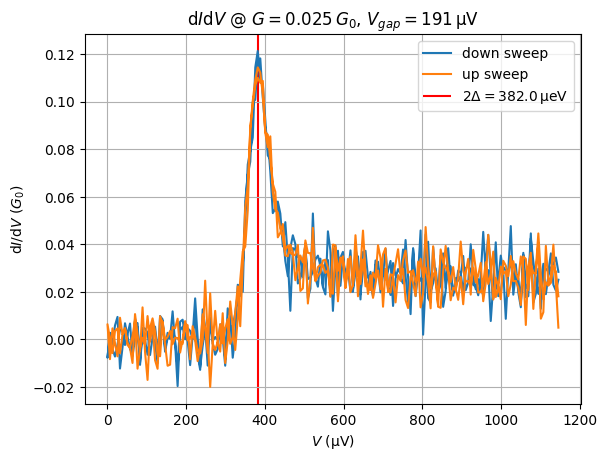

In [325]:
%matplotlib inline
plt.close(3)
plt.figure(3)

Vgap = 191e-6
G_0 = 7.7481e-5

plt.plot(np.abs(V_raw)*1e6, dIdV_raw_down/G_0, label='down sweep')
plt.plot(np.abs(V_raw)*1e6, dIdV_raw_up/G_0, label='up sweep')
ylim = plt.ylim()

# plt.vlines(Vgap*1e6, ymin=ylim[0], ymax=ylim[1], color='k', label=fr'$1\,\Delta/e = {Vgap*1e6:.1f}\,$µV', zorder=1)
plt.vlines(2*Vgap*1e6, ymin=ylim[0], ymax=ylim[1], color='red', label=fr'$2\Delta = {2*Vgap*1e6:.1f}\,$µeV', zorder=1)


plt.ylim(ylim)
plt.grid()
plt.legend()
plt.xlabel(r'$V\ ($µV$)$')
plt.ylabel(r'd$I/$d$V\ (G_0)$')
plt.title('d$I$d$V$ @ $G=0.025\,G_0$, $V_{gap}=191\,$µV')
plt.savefig('dIdV G=0.025G0 tunnelbarrier.pdf')
plt.savefig('dIdV G=0.025G0 tunnelbarrier.png')

- define constants

In [8]:
h = 6.62607015e-34  # V * A * s²
e = 1.602176634e-19 #     A * s
Vgap = 191e-6       # V
Delta = Vgap*e      # V * A * s
G_0 = 2*e**2/h      # A / V
R_0 = h/(2*e**2)    # V / A

- get theoretical IV curves from Carlos

In [163]:
path = 'CarlosIV'
arr = os.listdir(f'{path}')
arr.remove('iv.in')
arr.remove('iv.for')

v_norm = np.linspace(0,5.99,600)
V_norm = np.concatenate((-np.flip(v_norm)[:-1],v_norm))
T_theo = np.zeros(len(arr)+1, dtype='float64')
I_norm_theo = np.zeros((len(T_theo), len(v_norm)), dtype='float64')

for i in range(len(arr)):
    temp = arr[i][:-4]
    value = int(temp)*10**(-len(temp)+1)
    T_theo[i+1] = value

for i, a in enumerate(arr):
    v_norm_theo = np.genfromtxt(f'{path}/{a}')[:,0]
    i_norm_theo = np.genfromtxt(f'{path}/{a}')[:,1]
    I_norm_theo[i+1,:] = bin_y_over_x(v_norm_theo, i_norm_theo, v_norm)

I_theo = np.concatenate((-np.flip(I_norm_theo, axis=1)[:,:-1],I_norm_theo), axis=1)

dIdV_norm_theo = np.gradient(I_norm_theo, v_norm, axis=1)
dIdV_theo = np.gradient(I_theo, V_norm, axis=1)

Text(0, 0.5, 'd$I/$d$V\\ (G_0)$')

<Figure size 640x480 with 0 Axes>

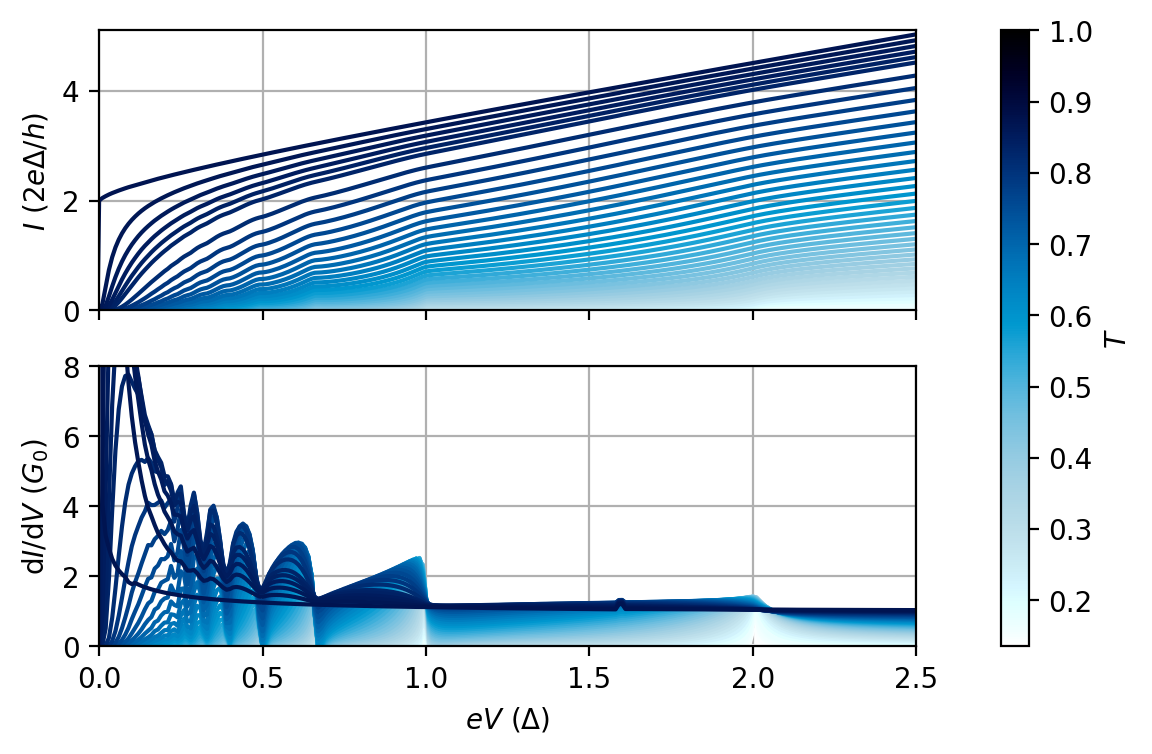

In [164]:
%matplotlib inline
plt.figure(1)
fig, axs = plt.subplots(figsize=(6,4), ncols=2, nrows=2, dpi=200,
        gridspec_kw={"width_ratios":[5.8,.2]})
gs = axs[0,1].get_gridspec()
ax11 = axs[0,0]
ax12 = axs[1,0]

t, _ = np.meshgrid(T_theo, np.ones((47,)))
im = axs[0,1].imshow(t, cmap = cpd.images(inverse=True), lim=(1, .15))
axs[0,1].remove()
axs[1,1].remove()
ax_clb = fig.add_subplot(gs[:,-1])

for i, T in enumerate(T_theo):
    ax11.plot(V_norm, I_theo[i,:], '-',label=f'{T:0.03}', color = cpd.images()((1-T*.85)))
    ax12.plot(V_norm, dIdV_theo[i,:], '-',label=f'{T:0.03}', color = cpd.images()((1-T*.85)))

cbar=fig.colorbar(im, label=r'$T$', cax=ax_clb)

ax11.set_xticklabels([])
ax11.grid()
ax12.grid()
ax11.set_xlim(0,2.5)
ax12.set_xlim(0,2.5)
ax11.set_ylim(0,5.1)
ax12.set_ylim(0,8)

ax11.set_ylabel(r'$I\ (2e\Delta/h)$')
ax12.set_xlabel(r'$eV\ (\Delta)$')
ax12.set_ylabel(r'd$I/$d$V\ (G_0)$')


- Get experimental data

In [165]:
path = os.getcwd()
file_1G0 = h5py.File(f'{path}/../23 11 10 PR22e9 1.2G0/23_11_10_1.2G_0.hdf5', 'r')
file_3G0 = h5py.File(f'{path}/../23 11 17 PR22e9 3.6G (Keysight VNA)/23_11_17_PR22e9_KeysightVNA_3.6G_0.hdf5', 'r')
file_4G0 = h5py.File(f'{path}/../23 11 15 PR22e9 4.3G/23_11_15_PR22e9_4.3G_1.hdf5', 'r')
# list(file['measurement'].keys())

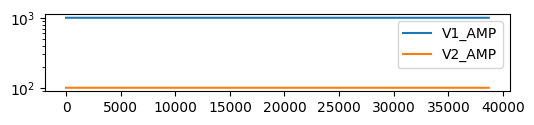

In [166]:
%matplotlib inline
plt.figure(figsize=(6,1))
plt.semilogy(file_4G0["status"]["femtos"]["amp_A"], label='V1_AMP')
plt.semilogy(file_4G0["status"]["femtos"]["amp_B"], label='V2_AMP')
plt.legend()

V1_AMP = 1000
V2_AMP_1G0 = 1000
V2_AMP_3G0 = 100
V2_AMP_4G0 = 100
R_REF = 53000

In [167]:
from torch.nn import Upsample
from torch import from_numpy

def bin_y_over_x(x, y, x_bins, upsampling=None):
    if upsampling is not None:
        k = np.full((2, len(x)), np.nan)
        k[0,:] = x
        k[1,:] = y
        m = Upsample(mode='linear', scale_factor=100)
        big = m(from_numpy(np.array([k])))
        x = np.array(big[0,0,:])
        y = np.array(big[0,1,:])
    else:
        pass

    # Apply binning based on histogram function
    x_nu = np.append(x_bins, 2*x_bins[-1]-x_bins[-2])
    x_nu = x_nu - (x_nu[1] - x_nu[0])/2
        # Instead of N_x, gives fixed axis.
        # Solves issues with wider ranges, than covered by data
    _count, _ = np.histogram(x,
                             bins = x_nu,
                             weights=None)
    _count = np.array(_count, dtype='float64')
    _count[_count==0] = np.nan

    _sum, _ = np.histogram(x,
                           bins = x_nu,
                           weights = y)    
    return _sum/_count

In [168]:
mkey = "magnetic fields_nanGHz_+nandBm"
to_pop = "no_field"

G_exp = np.array([1.3, 2.9, 3.15])
V2_AMP = np.array([V2_AMP_1G0, V2_AMP_3G0, V2_AMP_4G0])
v_shift = np.array([-0.02, -.045, -.0355])

I_up = np.full((len(G),len(V_norm)), np.nan)
I_down = np.full((len(G),len(V_norm)), np.nan)
for j, file in enumerate([file_1G0, file_3G0, file_4G0]):
    offset= file['measurement'][mkey][to_pop]["offset"]["adwin"]
    off_v1 = np.nanmean(offset["V1"])
    off_v2 = np.nanmean(offset["V2"])

    sweep = file['measurement'][mkey][to_pop]["sweep"]["adwin"]
    trigger = np.array(sweep['trigger'], dtype='int')
    v1 = np.array(sweep['V1'], dtype='float64')
    v2 = np.array(sweep['V2'], dtype='float64')

    v = v1 / V1_AMP / Vgap - v_shift[j]
    i = v2 / V2_AMP[j] / R_REF / ( 2 * e * Delta / h)

    v_up   = v[trigger==1]
    v_down = v[trigger==2]
    i_up   = i[trigger==1]
    i_down = i[trigger==2]

    I_up[j,:]   = bin_y_over_x(v_up,   i_up,   V_norm, upsampling=100)
    I_down[j,:] = bin_y_over_x(v_down, i_down, V_norm, upsampling=100)

I_exp = np.nanmean((I_up, I_down), axis=0)
dIdV_exp = np.gradient(I_exp, V_norm, axis=1)

C:\Users\oliver\AppData\Local\Temp\ipykernel_14104\1866081979.py:31: RuntimeWarning: Mean of empty slice
  I_exp = np.nanmean((I_up, I_down), axis=0)


In [223]:
weight = np.exp(-(V_norm/2)**2)

T_len = len(T_theo)

MSD = []
indices = []
for i in range(T_len):
    for j in range(T_len-i):
        j = j+i
        for k in range(T_len-j):
            k=k+j
            I_theo_temp = I_theo[i,:] + I_theo[j,:] + I_theo[k,:]
            MSD.append(np.nanmean(weight*(I_exp[0,:]-I_theo_temp)**2))
            indices.append([i,j,k])

MSD = np.array(MSD)
indices = np.array(indices)

T_exp = T_theo[indices[np.argmin(MSD),:]]


In [222]:
T_exp

array([0.25, 0.25, 0.7 ])

In [322]:
%matplotlib qt

MSD_norm = MSD[:]-np.nanmin(MSD)
MSD_norm = MSD_norm/np.max(MSD_norm)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot([T_exp[0],T_exp[0]],[0,1],'-', zs=[T_exp[2],T_exp[2]], color=cpd.curves(color='magenta')(1), zorder=0)
ax.plot([0,1],[T_exp[1],T_exp[1]],'-', zs=[T_exp[2],T_exp[2]], color=cpd.curves(color='magenta')(1), zorder=0)
ax.plot([T_exp[0],T_exp[0]],[T_exp[1],T_exp[1]],'-', zs=[0,1], color=cpd.curves(color='magenta')(1), zorder=0)
ax.scatter(
    T_theo[indices[:,0]], 
    T_theo[indices[:,1]], 
    T_theo[indices[:,2]],
    marker='.', 
    alpha=.15,
    s=10*(1-MSD_norm)**8, 
    color=cpd.images(inverse=True)((1-MSD_norm)**8),
    )

a=.3
ax.scatter(T_exp[0], T_exp[1], T_exp[2], marker='.', s=100, color=cpd.curves(color='magenta')(1), zorder=1000, label=rf't={T_exp}')
ax.plot([0,1],[0,0],'-', zs=[T_exp[2],T_exp[2]], color=cpd.curves(color='magenta')(1), zorder=1000, alpha=a)
ax.plot([0,0],[0,1],'-', zs=[T_exp[2],T_exp[2]], color=cpd.curves(color='magenta')(1), zorder=1000, alpha=a)
ax.plot([T_exp[0],T_exp[0]],[0,1],'-', zs=[1,1], color=cpd.curves(color='magenta')(1), zorder=1000, alpha=a)
ax.plot([T_exp[0],T_exp[0]],[0,0],'-', zs=[0,1], color=cpd.curves(color='magenta')(1), zorder=1000, alpha=a)
ax.plot([0,0],[0,1],'-', zs=[T_exp[2],T_exp[2]], color=cpd.curves(color='magenta')(1), zorder=1000, alpha=a)
ax.plot([0,1],[T_exp[0],T_exp[1]],'-', zs=[1,1], color=cpd.curves(color='magenta')(1), zorder=1000, alpha=a)
ax.plot([0,0],[T_exp[0],T_exp[1]],'-', zs=[0,1], color=cpd.curves(color='magenta')(1), zorder=1000, alpha=a)

ax.invert_zaxis()
ax.invert_yaxis()
ax.set_xlim3d(0,1)
ax.set_ylim3d(1,0)
ax.set_zlim3d(1,0)

ax.set_xlabel('$t_1$')
ax.set_ylabel('$t_2$')
ax.set_zlabel('$t_3$')

ax.legend()

In [181]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i, m in enumerate(MSD):
    ax.scatter(indices[i,0], indices[i,1], indices[i,2], marker=m)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000271A2893E20> (for post_execute):


AttributeError: 'PathCollection' object has no attribute 'do_3d_projection'

AttributeError: 'PathCollection' object has no attribute 'do_3d_projection'

<Figure size 640x480 with 1 Axes>

In [ ]:

def fake_fit(Transmission, I_theo, I_exp):    
    T_len = len(Transmission)
    MSD = []
    indices = []
    for i in range(T_len):
        for j in range(T_len-i):
            j = j+i
            for k in range(T_len-j):
                k=k+j
                I_theo_temp = I_theo[i,:] + I_theo[j,:] + I_theo[k,:]
                MSD.append(np.mean((I_exp-I_theo_temp)**2))
                indices.append([i,j,k])
    MSD = np.array(MSD, dtype='float64')
    indices = np.array(indices, dtype='int8')

    argmin = np.argmin(MSD)

    transmissions = Transmission[indices[argmin]]
    I_fitted = I_theo[indices[argmin][0],:] + I_theo[indices[argmin][1],:] + I_theo[indices[argmin][2],:]

    return MSD, indices, transmissions, I_fitted

In [ ]:
# # ARCHIEVE
    
# dIdV_up   = np.gradient(I_up,   v_norm, axis=1)
# dIdV_down = np.gradient(I_down, v_norm, axis=1)

# I_up_abs   = np.nanmean((-np.flip(I_up,   axis=1), I_up),   axis=0)[:, len(V_norm)-1:]
# I_down_abs = np.nanmean((-np.flip(I_down, axis=1), I_down), axis=0)[:, len(V_norm)-1:]
# I_abs = np.nanmean((I_up_abs, I_down_abs), axis=0)

# I_smooth = np.full(np.shape(I_abs), np.nan)

# from statsmodels.api import nonparametric
# lowess = nonparametric.lowess
# for i in range(3):
#     I_smooth[i,:] = lowess(V, I, frac=frac, return_sorted=True)

# dIdV_up_abs   = np.gradient(I_up_abs,   V_norm, axis=1)
# dIdV_down_abs = np.gradient(I_down_abs, V_norm, axis=1)
# dIdV_abs = np.gradient(I_abs, V_norm, axis=1)

In [145]:
%matplotlib qt
color = ['red', 'green', 'blue']
for i in range(3):
    plt.plot(V_norm, I_exp[i,:],'.', label=i, color=color[i])
plt.grid()
plt.legend()

In [89]:
%matplotlib qt
color = ['red', 'green', 'blue']
for i in range(3):
    # plt.plot(v_norm, dIdV_up[i], '.', label=f'{i}', zorder=1, color=color[i])
    plt.plot(v_norm, I_up[i], '.', label=f'{i}', zorder=1, color=color[i])
    plt.plot(v_norm, I_down[i], '+', label=f'{i}', zorder=1, color=color[i])
    # plt.plot(V_norm, dIdV_up_abs[i], '-', label=f'{i}', color=color[i])
    # plt.plot(V_norm, dIdV_down_abs[i], '--', label=f'{i}', color=color[i])
    plt.plot(V_norm, I_abs[i], '-', label=f'{i}', color=color[i])
# plt.ylim(0,5)
plt.legend()




In [16]:
I_up[0,:] = bin_y_over_x(v_up,   i_up,   v_norm)

Text(0, 0.5, '$I (2e\\Delta/h$)')

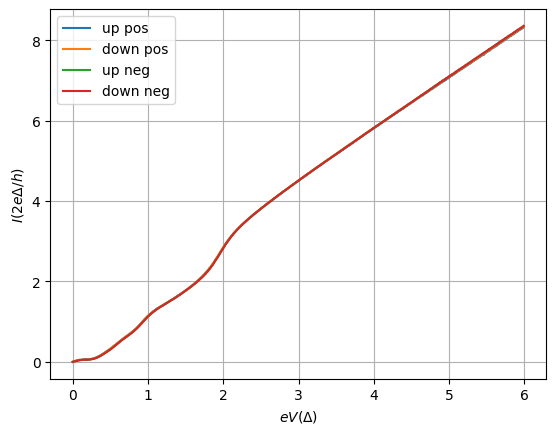

In [204]:
plt.close(4)
plt.figure(4)
plt.plot(V_norm, I_norm_up_pos,   label='up pos')
plt.plot(V_norm, I_norm_down_pos, label='down pos')
plt.plot(V_norm, I_norm_up_neg,   label='up neg')
plt.plot(V_norm, I_norm_down_neg, label='down neg')
plt.grid()
plt.legend()
plt.xlabel(r'$eV (\Delta$)')
plt.ylabel(r'$I (2e\Delta/h$)')

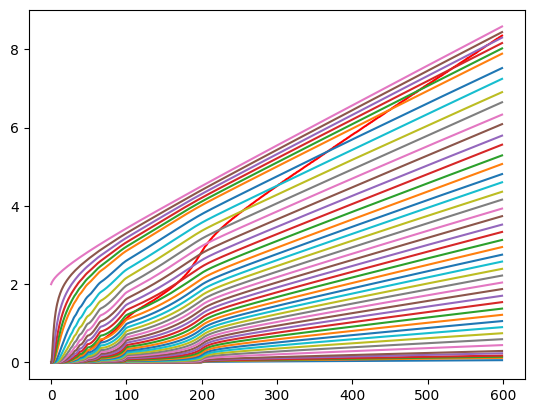

In [205]:
plt.plot(I_norm_down_neg,'r')
for i, t in enumerate(Transmission):
    plt.plot(I_norm_theo[i,:])

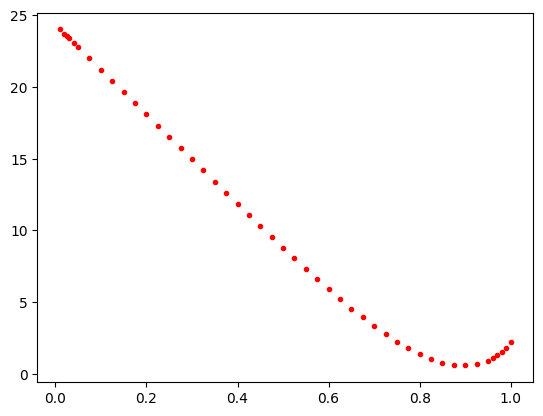

In [206]:
for i, t in enumerate(Transmission):
    plt.plot(t,np.mean((I_norm_up_pos-I_norm_theo[i,:])**2),'r.')

In [273]:
def get_theo_curves():
    arr = os.listdir('CarlosIV')
    arr.remove('iv.in')
    arr.remove('iv.for')

    Transmission = np.zeros(len(arr), dtype='float64')
    V_theo = np.linspace(0, 5.99, 600)
    I_theo = np.zeros((len(Transmission), len(V_theo)), dtype='float64')

    for i in range(len(arr)):
        temp = arr[i][:-4]
        value = int(temp)*10**(-len(temp)+1)
        Transmission[i] = value

    for i, a in enumerate(arr):
        v_theo = np.genfromtxt(f'CarlosIV/{a}')[:,0]
        i_theo = np.genfromtxt(f'CarlosIV/{a}')[:,1]
        I_theo[i,:] = bin_y_over_x(v_theo, i_theo, V_theo)
    dI_dV_theo = np.gradient(I_norm_theo, V_theo, axis=1)
    return V_theo, I_theo, dI_dV_theo, Transmission


def plot_theo_curves(V_theo, I_theo, dI_dV_theo, Transmission):
    plt.figure(1, figsize=(6,3))
    for i, T in enumerate(Transmission):
        plt.plot(V_theo, I_theo[i,:], '.',label=f'{T:0.03}')
    plt.grid()
    plt.xlim(0,2.5)
    plt.ylim(0,5.1)
    plt.xlabel(r'$V\ (\Delta/e)$')
    plt.ylabel(r'$I\ (2e\Delta/h)$')

    plt.figure(2, figsize=(6,3))
    for i, T in enumerate(Transmission):
        plt.plot(V_theo, dI_dV_theo[i,:], '.',label=f'{T:0.03}')
    plt.grid()
    plt.xlim(0,2.5)
    plt.ylim(0,8)
    plt.xlabel(r'$V\ (\Delta/e)$')
    plt.ylabel(r'd$I/$d$V\ (G_0)$')


def fake_fit(Transmission, I_theo, I_exp):    
    T_len = len(Transmission)
    MSD = []
    indices = []
    for i in range(T_len):
        for j in range(T_len-i):
            j = j+i
            for k in range(T_len-j):
                k=k+j
                I_theo_temp = I_theo[i,:] + I_theo[j,:] + I_theo[k,:]
                MSD.append(np.mean((I_exp-I_theo_temp)**2))
                indices.append([i,j,k])
    MSD = np.array(MSD, dtype='float64')
    indices = np.array(indices, dtype='int8')

    argmin = np.argmin(MSD)

    transmissions = Transmission[indices[argmin]]
    I_fitted = I_theo[indices[argmin][0],:] + I_theo[indices[argmin][1],:] + I_theo[indices[argmin][2],:]

    return MSD, indices, transmissions, I_fitted

%matplotlib qt

V_theo, I_theo, dI_dV_theo, Transmission = get_theo_curves()
# plot_theo_curves(V_theo, I_theo, dI_dV_theo, Transmission)
MSD, indices, transmissions, I_fitted = fake_fit(Transmission=Transmission, I_theo=I_norm_theo, I_exp=I_norm_up_pos)
plt.plot(np.gradient(I_norm_up_pos))
plt.plot(np.gradient(I_fitted))

In [223]:
T_len = len(Transmission)
MSD = np.zeros((T_len, T_len, T_len))

I_norms = [I_norm_up_pos, I_norm_up_neg, I_norm_down_pos, I_norm_down_neg]
MSDs = []
INDICES = []
TRANSMISSIONS = []
I_THEOS = []

for I_norm in I_norms:
    MSD = np.zeros((T_len, T_len, T_len))
    for i in range(T_len):
        for j in range(T_len):
            for k in range(T_len):
                I_theo = I_norm_theo[i,:] + I_norm_theo[j,:] + I_norm_theo[k,:]
                MSD[i,j,k] = np.mean((I_norm-I_theo)**2)

    indices = np.array(np.unravel_index(np.argmin(MSD), (T_len, T_len, T_len)))
    transmissions = Transmission[indices]
    I_theo = I_norm_theo[indices[0],:] + I_norm_theo[indices[1],:] + I_norm_theo[indices[2],:]
            
    MSDs.append(MSD)
    INDICES.append(indices)
    TRANSMISSIONS.append(transmissions)
    I_THEOS.append(I_theo)

# indices = np.array(np.unravel_index(np.argmin(MSD), (T_len, T_len, T_len)))
# transmissions = Transmission[indices]
# I_theo = I_norm_theo[indices[0],:] + I_norm_theo[indices[1],:] + I_norm_theo[indices[2],:]
TRANSMISSIONS

[array([0.175, 0.375, 0.675]),
 array([0.25 , 0.275, 0.7  ]),
 array([0.25 , 0.7  , 0.275]),
 array([0.01, 0.01, 0.01])]

In [224]:
%matplotlib qt
I_exps = [I_norm_up_pos, I_norm_up_neg, I_norm_down_pos, I_norm_down_neg]
for I in I_exps:
    plt.plot(I)

for i in range(4):
    plt.plot(I_THEOS[i])

In [48]:
T_len = len(Transmission)
MSD = np.zeros((T_len, T_len, T_len))

z=0
for i in range(T_len):
    for j in range(T_len):
        for k in range(T_len):
            I_theo = I_norm_theo[i,:] + I_norm_theo[j,:] + I_norm_theo[k,:]
            MSD[i,j,k] = np.mean((I_norm_down-I_theo)**2)
            
indices = np.array(np.unravel_index(np.argmin(MSD), (T_len, T_len, T_len)))
transmissions = Transmission[indices]
I_theo = I_norm_theo[indices[0],:] + I_norm_theo[indices[1],:] + I_norm_theo[indices[2],:]

In [232]:
T_len = len(Transmission)
MSD = np.zeros((T_len, T_len, T_len))

dIdV_exp = dIdV_norm_down_neg

for i in range(T_len):
    for j in range(T_len):
        for k in range(T_len):
            dIdV_theo = dIdV_norm_theo[i,:] + dIdV_norm_theo[j,:] + dIdV_norm_theo[k,:]
            MSD[i,j,k] = np.mean((dIdV_exp-dIdV_theo)**2)

indices = np.array(np.unravel_index(np.argmin(MSD), (T_len, T_len, T_len)))
transmissions = Transmission[indices]
I_theo = I_norm_theo[indices[0],:] + I_norm_theo[indices[1],:] + I_norm_theo[indices[2],:]
transmissions

array([0.2 , 0.25, 0.7 ])

In [49]:
plt.close(6)
plt.figure(6)
plt.plot(V_norm, I_theo, label=f'theo with t = {transmissions}')
plt.plot(V_norm, I_norm_down, label='exp')
plt.grid()
plt.legend()
plt.xlabel(r'$eV (\Delta)$')
plt.ylabel(r'$I (2e\Delta/h$)')

Text(0, 0.5, '$I (2e\\Delta/h$)')

Text(0, 0.5, '$dI/dV (G_0)$')

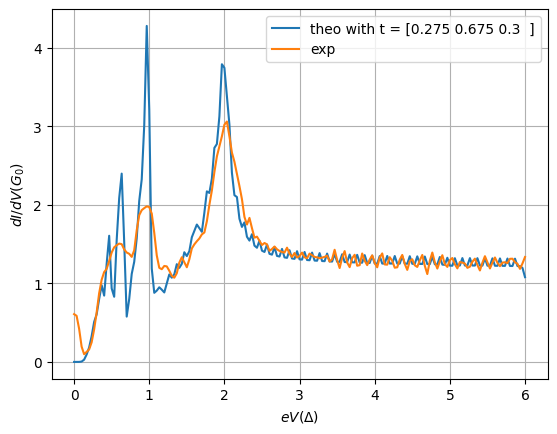

In [352]:
plt.close(7)
plt.figure(7)
plt.plot(V_norm, np.gradient(I_theo, V_norm), label=f'theo with t = {transmissions}')
plt.plot(V_norm, np.gradient(I_norm_down, V_norm), label='exp')
plt.grid()
plt.legend()
plt.xlabel(r'$eV (\Delta)$')
plt.ylabel(r'$dI/dV (G_0)$')

In [345]:
T_len = len(Transmission)
MSD = np.zeros((10000000, 6), dtype='int8')

z=0
for i in range(T_len):
    for j in range(T_len-i):
        j=i+j+1
        for k in range(T_len -j):
            k = k + j
            for l in range(T_len):
                for m in range(T_len):
                    for n in range(T_len):
                        I_theo = I_norm_theo[i,:] + I_norm_theo[j,:] + I_norm_theo[k,:]
                        I_theo = I_theo + I_norm_theo[l,:] + I_norm_theo[m,:] + I_norm_theo[n,:]
                        MSD[i,j,k,l,m,n] = np.mean((I_norm_down-I_theo)**2)
            
indices = np.array(np.unravel_index(np.argmin(MSD), (T_len, T_len, T_len, T_len, T_len, T_len)))
transmissions = Transmission[indices]
I_theo = I_norm_theo[0,:] + I_norm_theo[1,:] + I_norm_theo[2,:]
I_theo = I_theo + I_norm_theo[3,:] + I_norm_theo[4,:] + I_norm_theo[5,:]

IndexError: too many indices for array: array is 2-dimensional, but 6 were indexed

In [342]:

I_norm_down_mesh, _ = np.meshgrid(I_norm_down, Transmission)
I_norm_up_mesh, _ = np.meshgrid(I_norm_up, Transmission)

msd_down = np.mean((I_norm_down_mesh-I_norm_theo)**2, axis=1)
msd_up = np.mean((I_norm_up_mesh-I_norm_theo)**2, axis=1)


plt.plot(Transmission, msd_down, '.')
plt.plot(Transmission, msd_up, '.')

Transmission[np.argmin(msd_down)], Transmission[np.argmin(msd_up)]

7731052560

Text(0, 0.5, '$I (2e\\Delta/h$)')

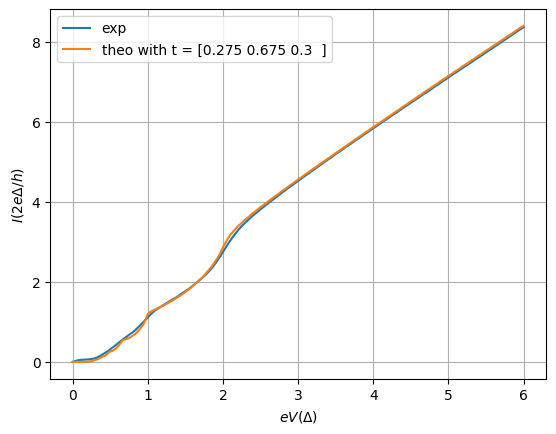